Import files

In [28]:
import pandas as pd
m = pd.read_csv('../Trial3.csv', encoding='utf-8')
m = m.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [18]:
unique_claim_ids = m['Claim ID'].unique()

In [224]:
m.head()

,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time
0,0,1254569956672450561,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",BREAK CURFEW! \r\n\r\n#COVID1984\r\n#SCAMDEMIC...,2020-11-09 13:08:18,2020-11-09,13:08:18
1,1,1255080816994025474,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",A MASK is better than a VENTILATOR.\r\nHOME is...,2020-11-09 06:13:41,2020-11-09,06:13:41
2,2,1251864580298506243,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",The latest One Wireless Place Times! https://t...,2020-11-09 11:04:41,2020-11-09,11:04:41
3,3,1248753789177335808,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",#Kenya Nakuru - over 500 customers ignoring c...,2020-11-08 09:05:59,2020-11-08,09:05:59
4,4,1252408156036030465,585,coronavirus life span in a single place is h...,"Public authority actions, policy, and communic...",Bandaragama Police arrested a suspect who misu...,2020-11-04 12:57:17,2020-11-04,12:57:17


# EXPERIMENT 1
TEMPORAL

In [4]:
from matplotlib import pyplot as plt
import numpy as np

def plot_timeline_of_group(m, claim_id):
    week_groups = m[m['Claim ID'].eq(claim_id)].groupby('Date').count()
    week_groups = week_groups / len(m[m['Claim ID'].eq(claim_id)])
    plot_timeline(week_groups)
    
def plot_timeline(groups):
    groups.plot(kind='bar',figsize=(10,5),legend=None)
    ax = plt.axes()
    every_nth = 5
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.show()


C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


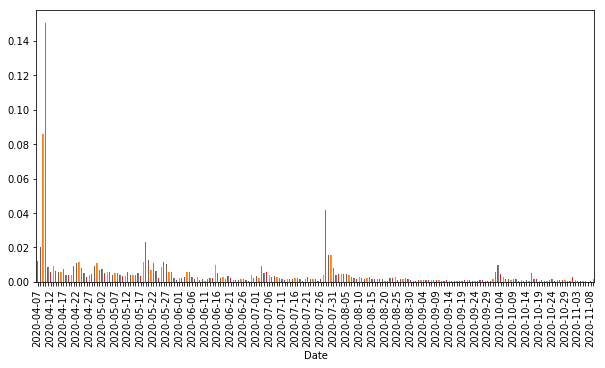

In [8]:
plot_timeline_of_group(m, 51)

In [2]:
import json
with open('../means_bow.json') as json_data:
    means_data = json.load(json_data) 
with open('../medians_bow.json') as json_data:
     medians_data = json.load(json_data) 
top_means = list(means_data.keys())[:50]
top_medians = list(medians_data.keys())[:50]

In [3]:
means_data

{'585': ['life',
  'place',
  'hour',
  'curfew',
  'india',
  'hour',
  'hour',
  'curfew',
  'viru',
  'kill'],
 '51': ['remdesivir',
  'hydroxychloroquin',
  'lopinavir',
  'ritonavir',
  'interferon',
  'regimen',
  'effici',
  'treatment'],
 '147': ['social',
  'medium',
  'claim',
  'patent',
  'novel',
  'patent',
  'vaccin',
  'patent'],
 '593': ['claim',
  'prime',
  'minist',
  'narendra',
  'modi',
  'hour',
  'curfew',
  'hour',
  'follow',
  'curfew'],
 '320': ['test', 'airlin', 'strong', 'test', 'test', 'train'],
 '681': ['live',
  'hour',
  'hour',
  'copper',
  'hour',
  'cardboard',
  'plastic',
  'stainless',
  'steel'],
 '132': ['china',
  'million',
  'mask',
  'africa',
  'africa',
  'prepar',
  'china',
  'distribut',
  'infect',
  'mask'],
 '383': ['claim',
  'itali',
  'doctor',
  'coupl',
  'italian',
  'hospit',
  'death',
  'italian',
  'hospit',
  'covid'],
 '794': ['drink',
  'water',
  'gargl',
  'warm',
  'water',
  'salt',
  'vinegar',
  'elimin',
  'nov

C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


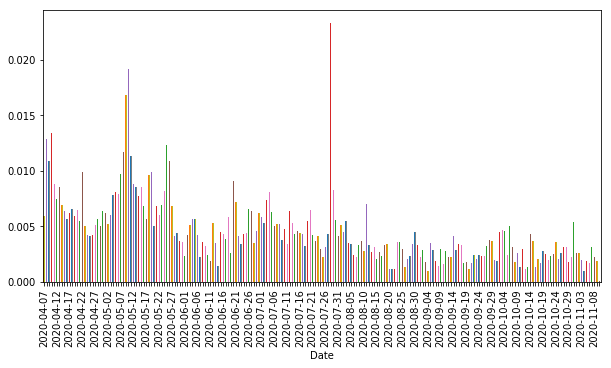

In [9]:
plot_timeline_of_group(m, 495)

C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


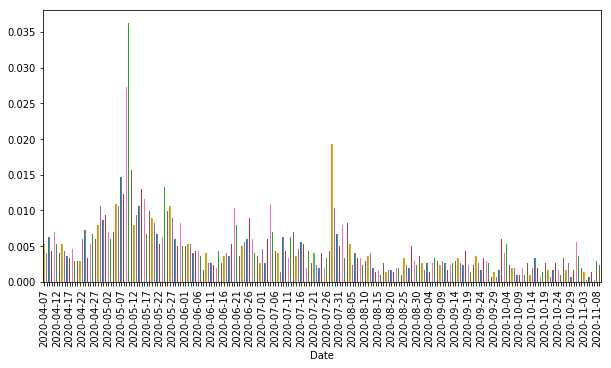

In [16]:
plot_timeline_of_group(m, 147)

# TEXT RELEVANCY PER CLAIM

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_series(series):
    series = series.str.replace(r'[_\W\d]',' ')
    series = series.str.lower()
    series = series.str.strip()
    return series


def get_tweet_similarity_for_claim(m, claim_id, claim, use_single_list=False):
    if use_single_list:
        corpus = [claim] + clean_series(m['text']).tolist()
    else:
        corpus = [claim] + clean_series(m[m['Claim ID'].eq(claim_id)]['Tweet']).tolist()
    vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
    tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
    pairwise_similarity = tfidf * tfidf.T
    arr = pairwise_similarity.toarray()
    np.fill_diagonal(arr, np.nan)                                                                                                                                                                                                                            
    result_idx = np.nanargmax(arr[0])  #top tweet
    print(arr[0][result_idx])
    print(corpus[result_idx])
    return arr

def get_top_tweets_for_claim(m, claim_id, claim, topN=150, use_single_list=False):
    arr = get_tweet_similarity_for_claim(m, claim_id, claim, use_single_list=use_single_list)
    temp = np.argpartition(arr[0], -topN)[-topN:]
    
    if use_single_list:
        tweets_for_claim = clean_series(m['text']).tolist()
    else:
        tweets_for_claim = clean_series(m[m['Claim ID'].eq(claim_id)]['Tweet'])
    count = 0
    for idx in temp:
        if arr[0][idx]>0.15:
            #print(arr[0][idx])
            count += 1
            #if use_single_list:
            #    print(tweets_for_claim[idx])
            #else:
            #    print(tweets_for_claim.iloc[idx])
    print(count)
    return arr, temp
claim = m[m['Claim ID'].eq(51)]['Claim'].iloc[0].replace(r'[_\W\d]',' ').strip()
claim = claim.lower()
arr, top_relevant_tweets = get_top_tweets_for_claim(m, 51, claim, use_single_list=False)    


0.42191611979557686
remdesivir   hydroxychloroquine   lopinavir ritonavir and interferon regimens appeared to have little or no effect on    day mortality or the in hospital course of  covid   among hospitalised patients  https   t co x iebdlqi
88


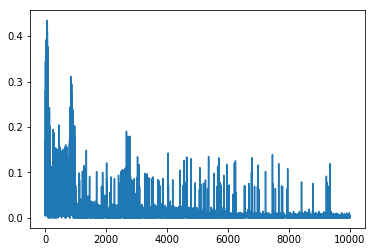

In [176]:
plt.plot(arr[0])
plt.show()

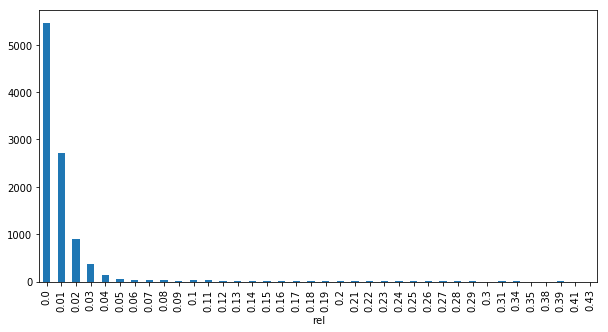

In [187]:
relevancy_scores = pd.DataFrame({"rel":arr[0]})
relevancy_scores = relevancy_scores.dropna()
relevancy_count = relevancy_scores.groupby(relevancy_scores['rel'].apply(lambda x: round(x, 2))).count()
relevancy_count.plot(kind='bar',figsize=(10,5),legend=None)
plt.show()

# EXPERIMENT 2
Conspiracy Theories - how they look

In [158]:
CATEGORIES = [
    'Public authority actions, policy, and communications', 
    'Community spread and impact',
    'Medical advice and self-treatments',
    #'Claims about prominent actors',
    'Conspiracy theories',
    'Virus transmission',
    'Virus origin and properties',
    'Public preparedness, protests, and civil disobedience',
    'Vaccines, medical treatments, and tests',
    #'Other',
]


In [17]:
m[m['Category'].eq('Conspiracy theories')]

,Unnamed: 0,Unnamed: 0.1,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time
8068,19998,19998,0,1288069740427182080,147,posts on social media claim there is a us pate...,Conspiracy theories,Deal?\r\n#vaccino #vaccine #VaccineUnTitre #va...,2020-11-09 19:33:47,2020-11-09,19:33:47
8069,19999,19999,1,1279814604189728770,147,posts on social media claim there is a us pate...,Conspiracy theories,She has come under pressure over a reported £6...,2020-11-09 15:03:41,2020-11-09,15:03:41
8070,20000,20000,2,1257067178194501633,147,posts on social media claim there is a us pate...,Conspiracy theories,https://t.co/CXN9ysRS3y\r\n\r\n#CoronaVirus #V...,2020-11-09 17:49:14,2020-11-09,17:49:14
8071,20002,20002,4,1263192066437402624,147,posts on social media claim there is a us pate...,Conspiracy theories,#JACStech #cryptocurrency Check this medium po...,2020-11-06 14:29:58,2020-11-06,14:29:58
8072,20005,20005,7,1259370085572947968,147,posts on social media claim there is a us pate...,Conspiracy theories,Can anyone comment how a patent on testing for...,2020-11-05 22:35:34,2020-11-05,22:35:34
8073,20007,20007,9,1253496379613286400,147,posts on social media claim there is a us pate...,Conspiracy theories,More fake hype over #5g which is for #patent #...,2020-11-02 21:08:51,2020-11-02,21:08:51
8074,20013,20013,15,1250428897524506630,147,posts on social media claim there is a us pate...,Conspiracy theories,"See page-9, of this 72-page, 2007 US-Patent-Ap...",2020-10-31 18:18:52,2020-10-31,18:18:52
8075,20016,20016,18,1310897531690377216,147,posts on social media claim there is a us pate...,Conspiracy theories,When assessing 5G Standard Essential Patents (...,2020-10-28 13:19:33,2020-10-28,13:19:33
8076,20017,20017,19,1295615893674885120,147,posts on social media claim there is a us pate...,Conspiracy theories,AmpliTech Recent Patent Filings for 5G/6G Comp...,2020-10-28 12:00:19,2020-10-28,12:00:19
8077,20018,20018,20,1290293849898639360,147,posts on social media claim there is a us pate...,Conspiracy theories,CBN Launches Agric Small Medium Enterprise Sch...,2020-10-28 18:34:33,2020-10-28,18:34:33


C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


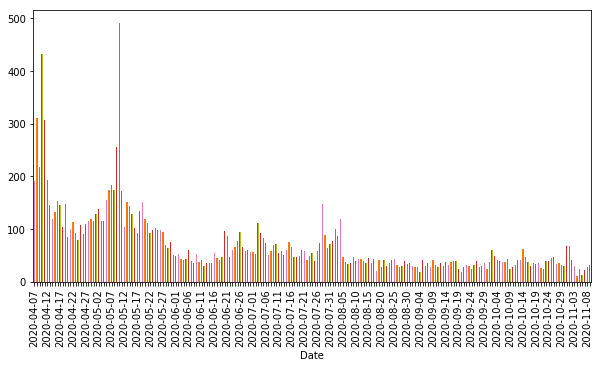

In [21]:
plot_timeline(m[m['Category'].eq('Conspiracy theories')].groupby('Date').count())

C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


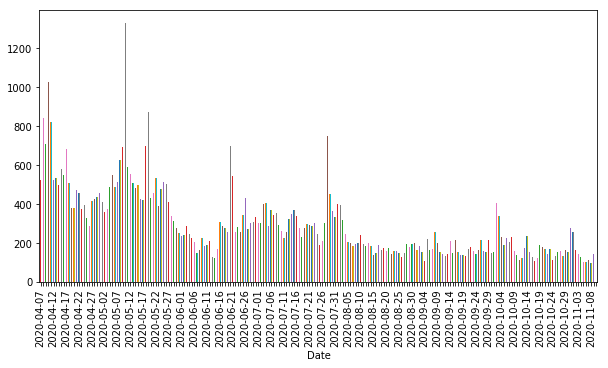

In [22]:
plot_timeline(m[m['Category'].eq(CATEGORIES[0])].groupby('Date').count())

C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


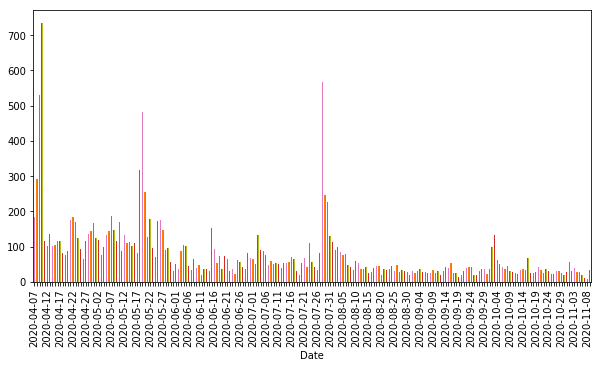

In [23]:
plot_timeline(m[m['Category'].eq(CATEGORIES[-2])].groupby('Date').count())

In [144]:
def plot_conditions(m, conditions_list, conditional_label):
    fig, ax = plt.subplots(8)
    subplot_i = 0
    for i, condition in enumerate(conditions_list):
        week_groups = m[m[conditional_label].eq(condition)].groupby('Date').count()
        #week_groups = week_groups/len(m[m[conditional_label].eq(condition)])
        if not week_groups.empty:
            week_groups.plot(kind='bar',figsize=(20,40), ax=ax[subplot_i], legend=None)
            ax[subplot_i].set_xlabel('{}: {}'.format(conditional_label, condition))
            every_nth = 10
            for n, label in enumerate(ax[subplot_i].xaxis.get_ticklabels()):
                if n % every_nth != 0:
                    label.set_visible(False)
            subplot_i += 1
    plt.tight_layout()
    plt.show()

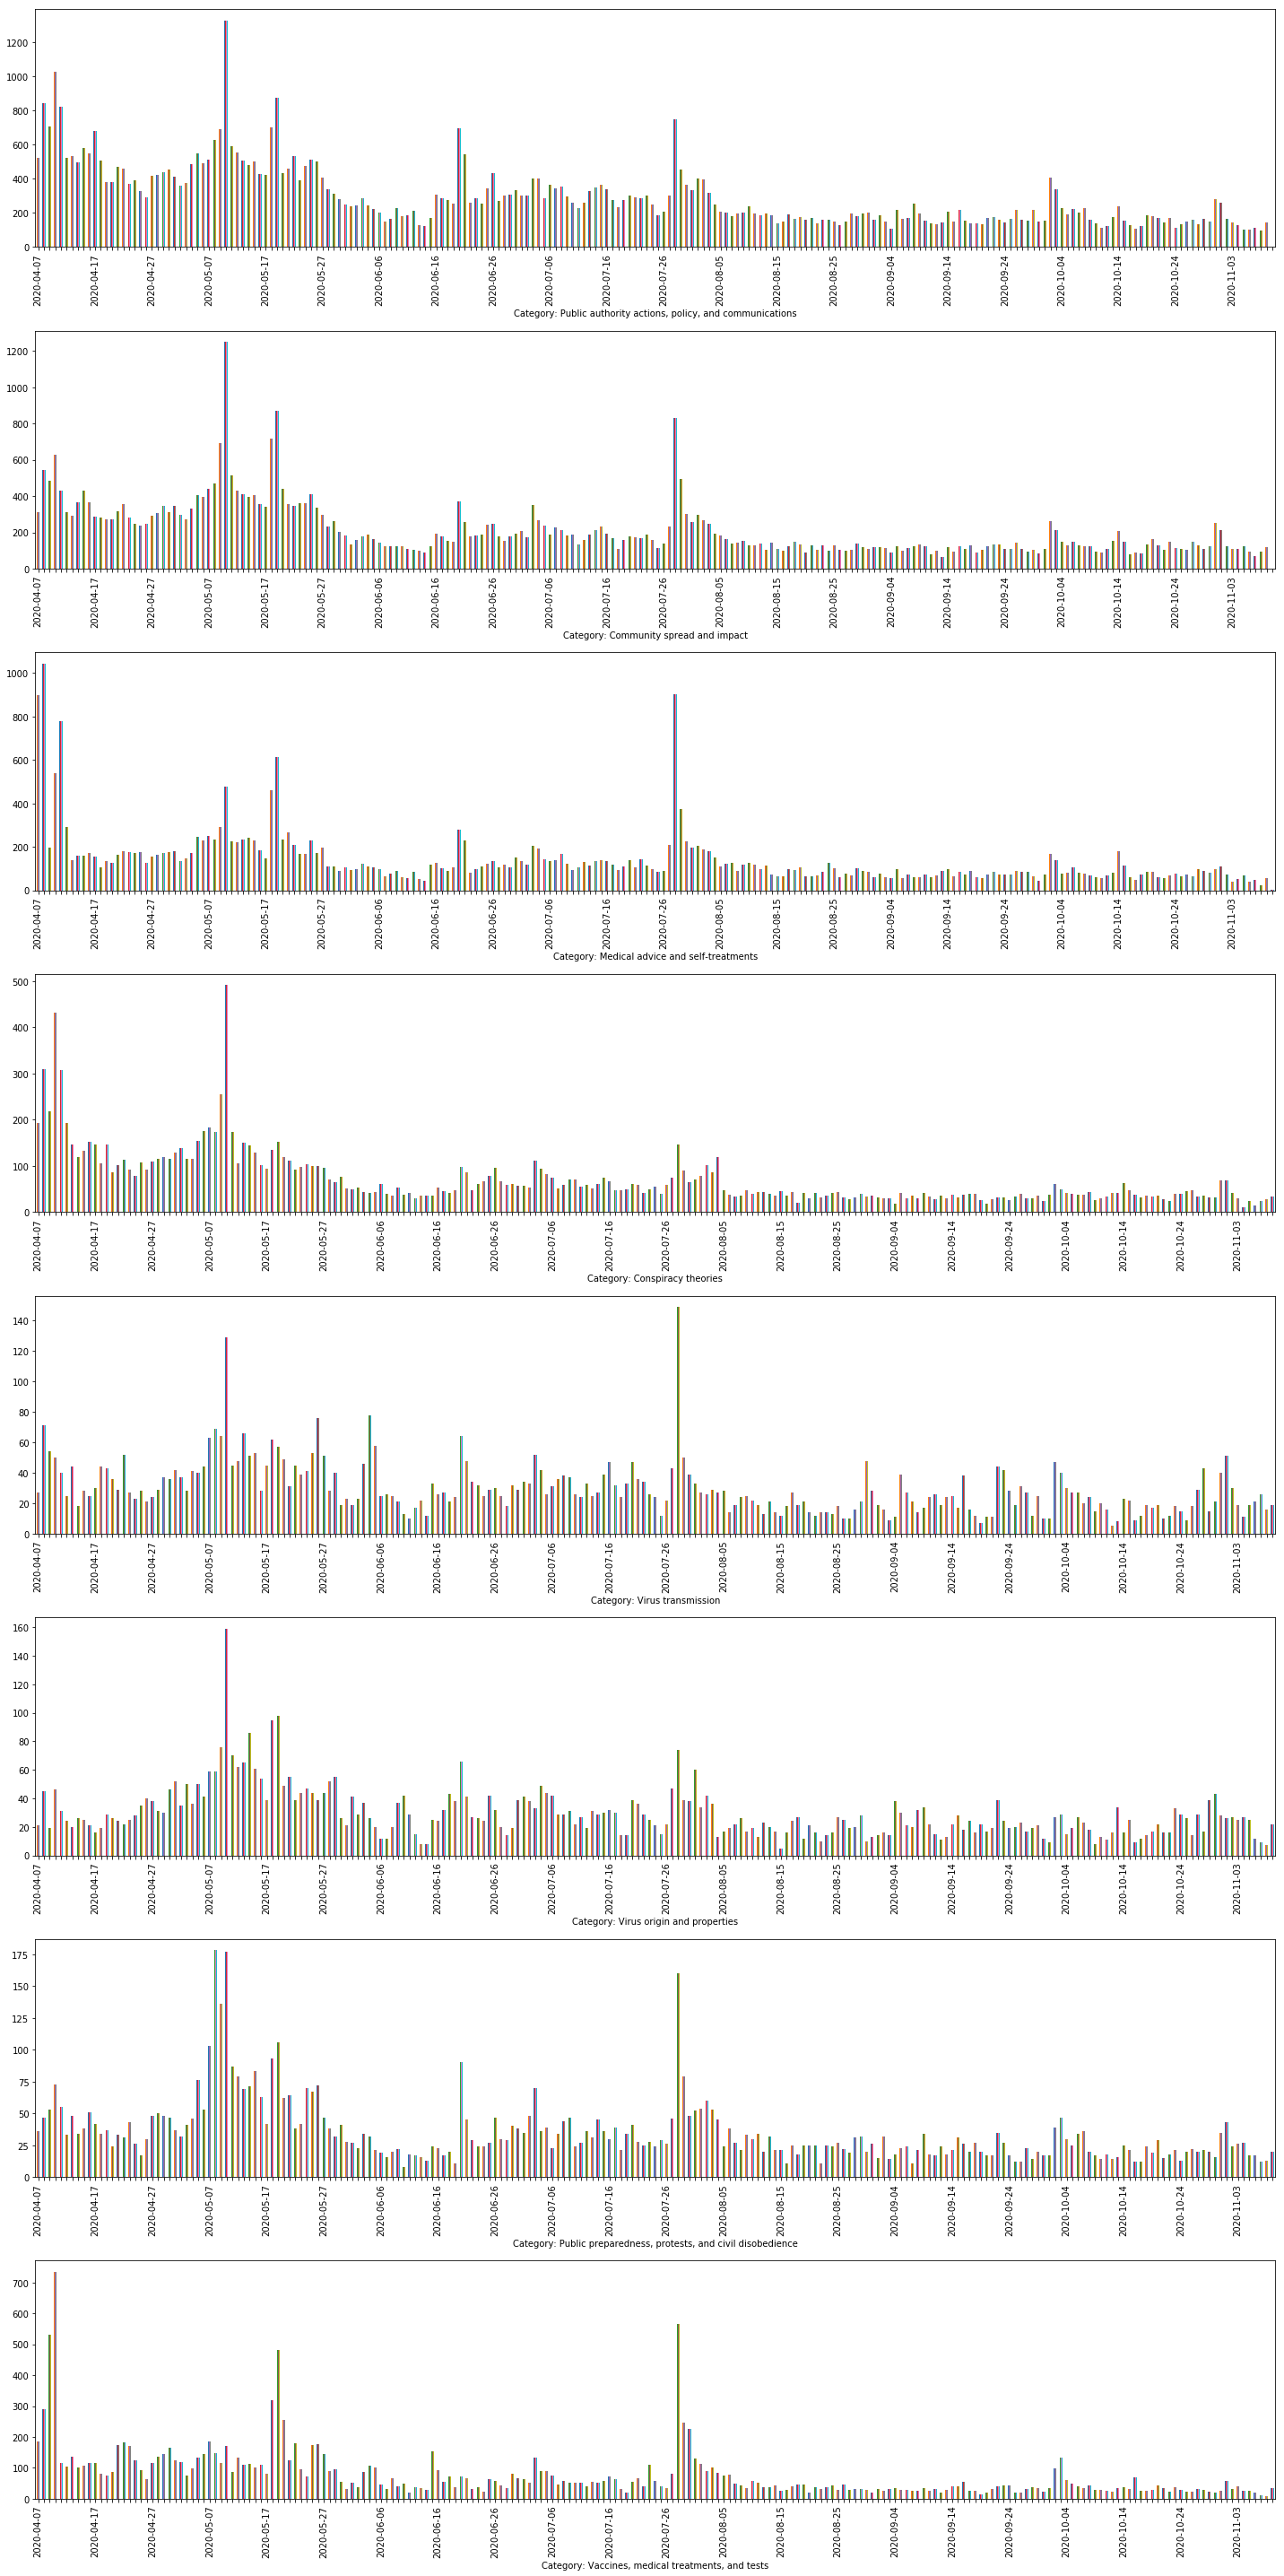

In [145]:
plot_conditions(m, CATEGORIES, 'Category')

C:\Users\Ruxandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


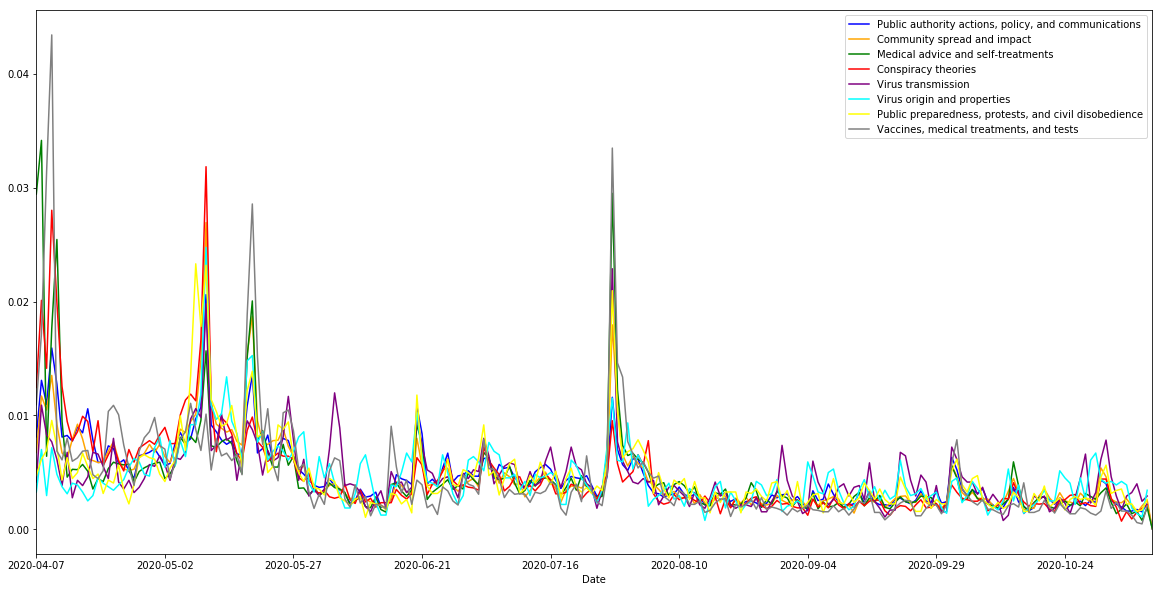

In [184]:
import matplotlib
ax = plt.gca()
pairs = m.groupby(['Category', 'Date'], as_index=False).Claim.count()
for category, color in zip(CATEGORIES, ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'yellow', 'grey']):
    cat = pairs[pairs['Category'].eq(category)]
    cat['Claim'] = cat['Claim'] / sum(cat['Claim'])
    cat.plot(kind='line', x='Date', y='Claim', color=color, label=category, ax=ax, figsize=(20, 10))
    ax = plt.axes()
    every_nth = 1
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.legend(loc='best')
plt.show()

                                            Category  Claim
0  Public authority actions, policy, and communic...  64430
1            Vaccines, medical treatments, and tests  16901
2                                Conspiracy theories  15415
3                        Community spread and impact  46390
4                        Virus origin and properties   6421
5                 Medical advice and self-treatments  30560
6  Public preparedness, protests, and civil disob...   7633
7                                 Virus transmission   6510


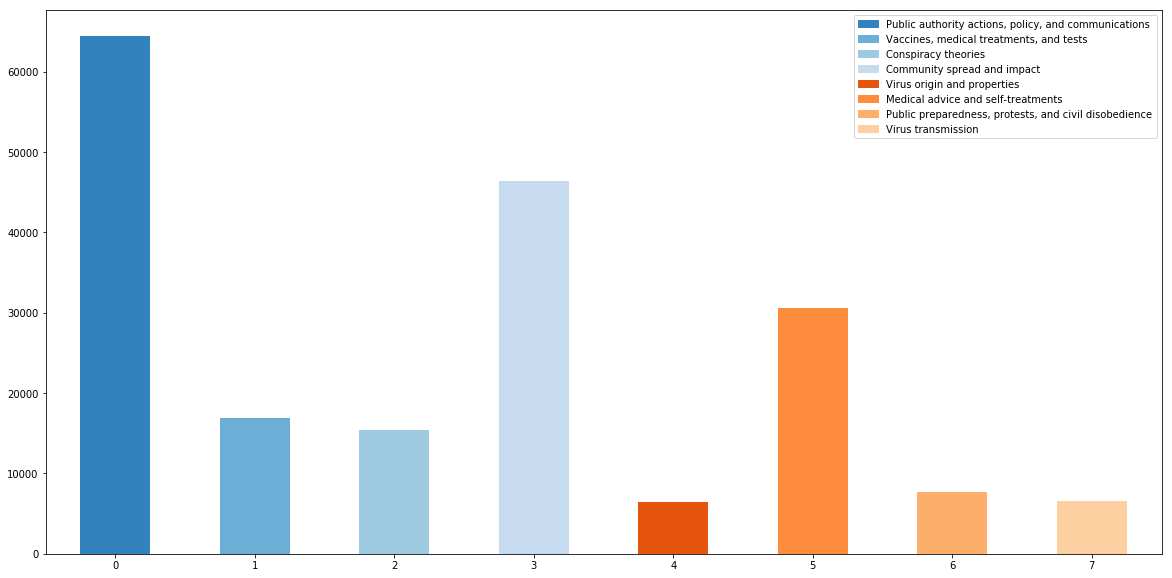

In [14]:
from matplotlib.patches import Patch
ax = plt.gca()
category_groups = m.groupby('Category', as_index=False, sort=False).Claim.count()
print(category_groups)
#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_xticklabels([labels])
#plt.legend(loc='best')
# chose a color map with enough colors for the number of bars
colors = [plt.cm.Vega20c(np.arange(len(category_groups['Category'])))]

category_groups.plot.bar(figsize=(20, 10), color=colors, ax=ax, rot=0)
# create color map with colors and df.names
cmap = dict(zip(category_groups['Category'], colors[0]))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

# add the legend
plt.legend(handles=patches, loc='best')
plt.show()

In [148]:
sum(category_groups.Claim)

194260

# BOT PEAKS

In [96]:
all_dates_group = m.groupby(['Date'], as_index=False).Claim.count()
most_common_dates = all_dates_group.nlargest(20, 'Claim')

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re

def clean_series(series):
    stop_words = stopwords.words('english')
    #sep = '(\B\#\w+)'
    #series = series.apply(lambda x: x.split(sep, 1)[0])
    series = series.apply(lambda x: ' '.join(re.sub("(\B\#\w+)|(\w+:\/\/\S+)"," ",x).split()))
    series = series.str.replace(r'[_\W\d]',' ')
    series = series.str.lower()
    series = series.str.strip()
    #series = series.apply(lambda x: " ".join([item for item in word_tokenize(x) if item not in stop_words]))
    return series

def get_crossref_similar_tweets(m):
    corpus = clean_series(m['Tweet']).tolist()
    vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
    tfidf = vect.fit_transform(corpus) 
    norm_value = tfidf.shape[0]
    pairwise_similarity = tfidf * tfidf.T
    pairwise_similarity = pairwise_similarity 
    arr = pairwise_similarity.toarray() 
    np.fill_diagonal(arr, np.nan)
    bot_tweets = []
    count = 0
    totals = []
    for i, row in enumerate(arr):
        result_idx = np.nanargmax(row)  #top tweet
        totals.append( (row[result_idx], (i, corpus[i]),  (result_idx, corpus[result_idx])))
        tweet_lengths_ratio = min(len(corpus[i]),len(corpus[result_idx])) / max(len(corpus[i]),len(corpus[result_idx]))
        
        if len(word_tokenize(corpus[i])) < 7 or len(word_tokenize(corpus[result_idx])) < 7:
            continue
        
        if(corpus[i] == corpus[result_idx]):
            count += 1
            bot_tweets.append(i)
            continue
        
        if (row[result_idx] >= 0.6) and result_idx != i and tweet_lengths_ratio > 0.5:
            count += 1
            #if row[result_idx] < 0.7:
            #    print('score: {}'.format(row[result_idx]))
            #    print('original tweet at idx {}: {}'.format(i, corpus[i]))
            #    print('duplicate tweet at idx {}: {}'.format(result_idx, corpus[result_idx]))
            #print('\n')
            bot_tweets.append(i)
            #print(m['Tweet'].iloc[result_idx])
            #print(m['Tweet'].iloc[i])
    print('{}/{} = {}%'.format(count, arr.shape[0], count/arr.shape[0]))
    sorted_bot_tweets = sorted(totals, key=lambda x: x[0], reverse=True)
    return arr, bot_tweets, sorted_bot_tweets

arr, bot_tweets, sorted_bot_tweets = get_crossref_similar_tweets(m[m['Date'].eq('2020-05-10')])    

473/4184 = 0.11304971319311663%


In [152]:
# Set position of bar on X axis
all_bots = {0:[], 1:[]}
for date in all_dates_group.nlargest(20, 'Claim')['Date']:
    _, bot_tweets, _ = get_crossref_similar_tweets(m[m['Date'].eq(date)])
    all_bots[0].append(len( m[m['Date'].eq(date)] ))
    all_bots[1].append(len(bot_tweets))

473/4184 = 0.11304971319311663%
611/3578 = 0.17076579094466182%
477/3527 = 0.13524241565069464%
404/3250 = 0.12430769230769231%
565/3194 = 0.17689417658108955%
368/2578 = 0.14274631497284718%
289/2576 = 0.11218944099378882%
282/2323 = 0.12139474817046922%
347/2264 = 0.15326855123674912%
325/2197 = 0.14792899408284024%
293/1955 = 0.14987212276214834%
232/1825 = 0.12712328767123288%
267/1795 = 0.14874651810584957%
225/1791 = 0.12562814070351758%
193/1737 = 0.1111111111111111%
236/1657 = 0.1424260712130356%
244/1645 = 0.14832826747720365%
247/1628 = 0.1517199017199017%
237/1613 = 0.14693118412895226%
303/1587 = 0.19092627599243855%


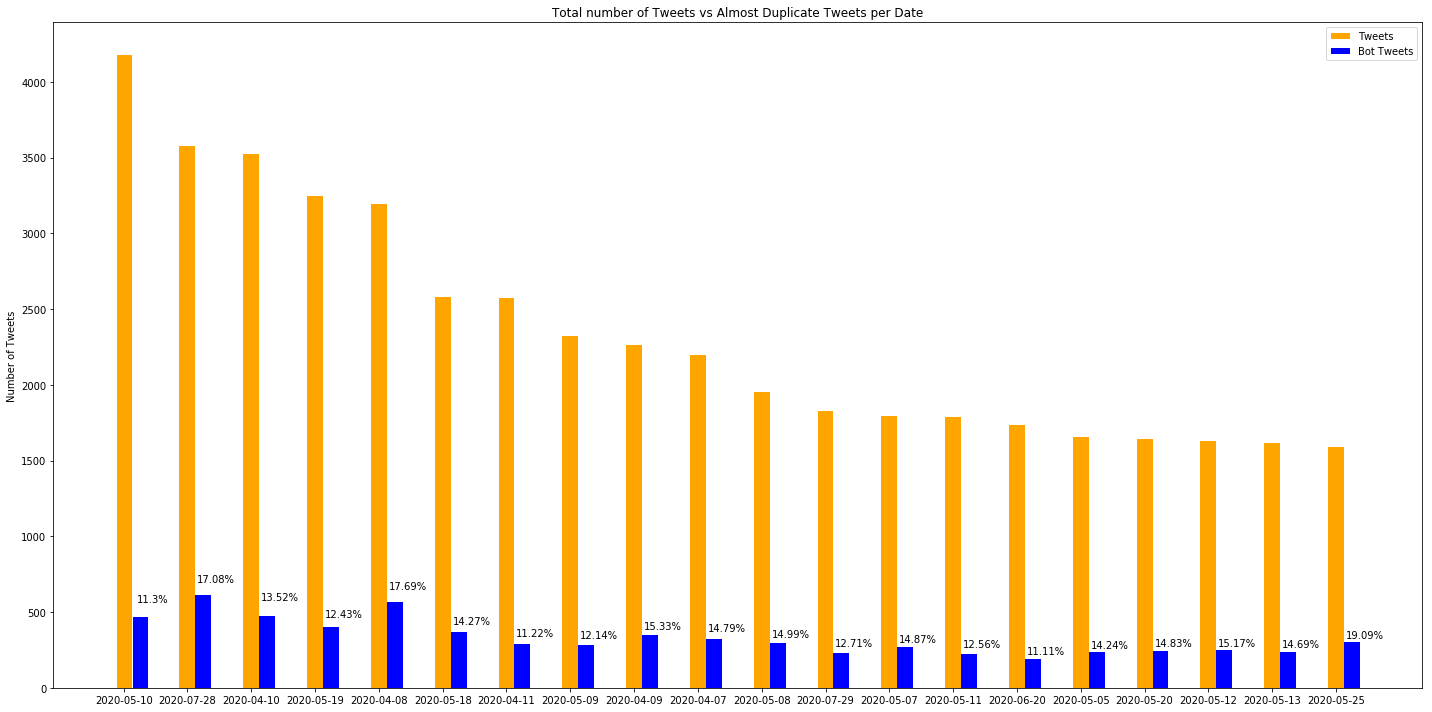

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.figure(figsize=(20, 10))
barWidth = 0.25
r1 = np.arange(20)
r2 = [x + barWidth for x in r1]
# Make the plot
rects1 = plt.bar(r1, all_bots[0], color='orange', width=barWidth, edgecolor='white', label='Tweets')
rects2 = plt.bar(r2, all_bots[1], color='blue', width=barWidth, edgecolor='white', label='Bot Tweets')
rects = ax.patches
for i, (totals, bots) in enumerate(zip(all_bots[0], all_bots[1])):
    height = rects[i].get_height()
    #ax.text(rects[i].get_x() + rects[i].get_width() / 2, height + 5,str(np.round(bots/totals, 2)) + '%', va='center', ha='center')
    ax.text(i+0.45, height*(np.round(bots/totals, 2)+0.03), str(np.round(bots/totals * 100, 2)) + '%', va='center', ha='center')
ax.set_ylabel('Number of Tweets')
ax.set_title('Total number of Tweets vs Almost Duplicate Tweets per Date')
ax.set_xticks(np.arange(len(most_common_dates['Date'])))
ax.set_xticklabels(most_common_dates['Date'])
ax.legend()

fig.tight_layout()
plt.show()

In [154]:
most_common_50_dates = all_dates_group.nlargest(50, 'Claim')

In [156]:
m_copy = m.copy()
print(len(m_copy))
for date in most_common_50_dates['Date']:
    date_m = m[m['Date'].eq(date)]
    _, bot_tweets, _ = get_crossref_similar_tweets(date_m)
    m_copy = m_copy.drop(date_m.index[bot_tweets])
print(len(m_copy))
                         

194260
473/4184 = 0.11304971319311663%
611/3578 = 0.17076579094466182%
477/3527 = 0.13524241565069464%
404/3250 = 0.12430769230769231%
565/3194 = 0.17689417658108955%
368/2578 = 0.14274631497284718%
289/2576 = 0.11218944099378882%
282/2323 = 0.12139474817046922%
347/2264 = 0.15326855123674912%
325/2197 = 0.14792899408284024%
293/1955 = 0.14987212276214834%
232/1825 = 0.12712328767123288%
267/1795 = 0.14874651810584957%
225/1791 = 0.12562814070351758%
193/1737 = 0.1111111111111111%
236/1657 = 0.1424260712130356%
244/1645 = 0.14832826747720365%
247/1628 = 0.1517199017199017%
237/1613 = 0.14693118412895226%
303/1587 = 0.19092627599243855%
209/1585 = 0.13186119873817034%
227/1569 = 0.14467813894200127%
171/1563 = 0.10940499040307101%
215/1501 = 0.14323784143904064%
234/1498 = 0.15620827770360482%
333/1480 = 0.225%
284/1476 = 0.19241192411924118%
212/1475 = 0.14372881355932204%
283/1465 = 0.1931740614334471%
224/1454 = 0.15405777166437415%
205/1397 = 0.1467430207587688%
190/1357 = 0.1400147

C:\Users\Ruxandra\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


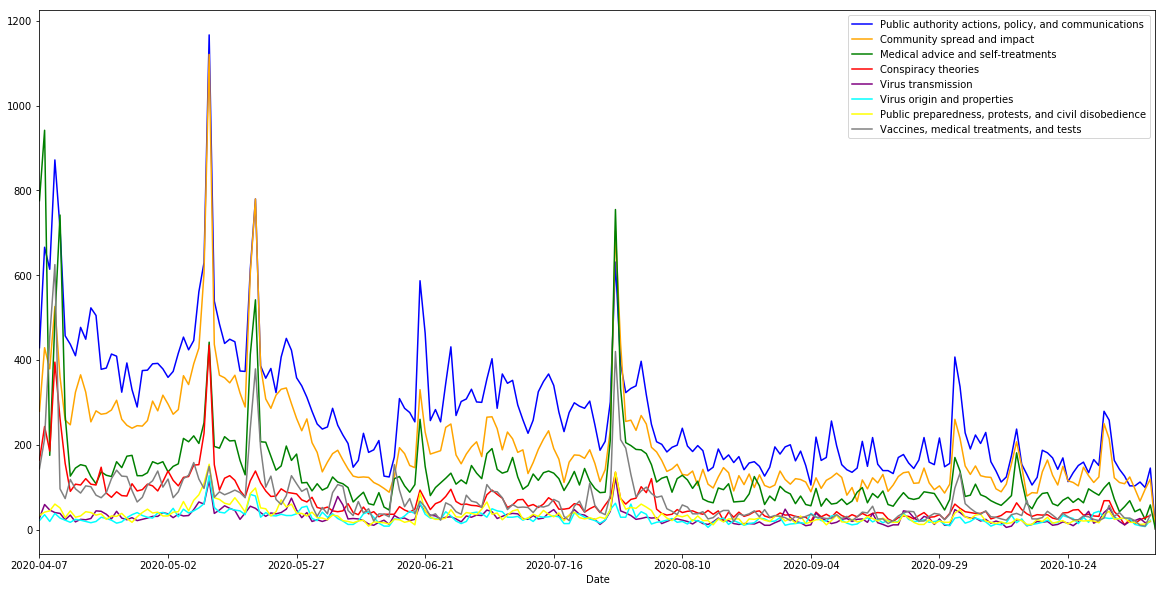

In [159]:
import matplotlib
ax = plt.gca()
pairs = m_copy.groupby(['Category', 'Date'], as_index=False).Claim.count()
for category, color in zip(CATEGORIES, ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'yellow', 'grey']):
    cat = pairs[pairs['Category'].eq(category)]
    #cat['Claim'] = cat['Claim'] / sum(cat['Claim'])
    cat.plot(kind='line', x='Date', y='Claim', color=color, label=category, ax=ax, figsize=(20, 10))
    ax = plt.axes()
    every_nth = 1
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.legend(loc='best')
plt.show()

In [29]:
m[m['Date'].eq('2020-05-10') & m['Category'].eq('Conspiracy theories')]

,index,Tweet ID,Claim ID,Claim,Category,Tweet,Full_date,Date,Time
8236,475,1262495961999384578,147,posts on social media claim there is a us pate...,Conspiracy theories,Security is a fundamental consideration in eve...,2020-05-10 19:31:33,2020-05-10,19:31:33
8237,476,1300786889411252226,147,posts on social media claim there is a us pate...,Conspiracy theories,Eight Reasons to End the Lockdowns Now - Jonat...,2020-05-10 20:12:49,2020-05-10,20:12:49
8264,567,1249553664252891136,147,posts on social media claim there is a us pate...,Conspiracy theories,IBM Secures Patent for ‘Self-Aware Token’ to R...,2020-05-10 12:20:25,2020-05-10,12:20:25
8265,571,1247568021297782789,147,posts on social media claim there is a us pate...,Conspiracy theories,NEW DELHI: A medium-intensity \r\n#earthquake ...,2020-05-10 09:46:37,2020-05-10,09:46:37
8452,425,1259509630591356929,147,posts on social media claim there is a us pate...,Conspiracy theories,I have transcribed into a READABLE TRANSCRIPT ...,2020-05-10 18:10:11,2020-05-10,18:10:11
8464,519,1248093339192160256,147,posts on social media claim there is a us pate...,Conspiracy theories,For the #COVIDIOTS ignoring social distancing....,2020-05-10 22:01:22,2020-05-10,22:01:22
8661,484,1323177188980518912,147,posts on social media claim there is a us pate...,Conspiracy theories,What is the first thing you are doing when the...,2020-05-10 17:33:01,2020-05-10,17:33:01
8662,492,1256411081427357697,147,posts on social media claim there is a us pate...,Conspiracy theories,"you guessed it the number for apple shares, 66...",2020-05-10 19:16:48,2020-05-10,19:16:48
8808,453,1267085755362541569,147,posts on social media claim there is a us pate...,Conspiracy theories,So it couldn't be any more clearer. You HAVE t...,2020-05-10 18:13:12,2020-05-10,18:13:12
8972,426,1247525746093912064,147,posts on social media claim there is a us pate...,Conspiracy theories,Boris using construction workers as ginea pigs...,2020-05-10 18:29:44,2020-05-10,18:29:44


# Similarity of tweets in top claims

In [169]:
count = 0
for key in m['Claim ID'].unique():
    if str(key) in list(means_data.keys())[:50]:
        print(key)
        count += 1
count 

585
51
147
593
320
681
132
383
794
717
125
258
834
714
540
453
273
417
479
508
363
1393
155
65
307
769
1175
1104
1212
331
616
1069
771
225
897
392
827
820
134
567
106
1075
123
667
945
941
482
500
663


49

In [194]:
def get_group_claim_cosine_sim(m, claim_id, claim):
    arr = get_tweet_similarity_for_claim(m, claim_id, claim, False)
    total_sum = sum([row[np.nanargmax(row)] for row in arr]) / arr.shape[0]
    print(total_sum)
    return total_sum

def get_group_cosine_sim(m):
    corpus = clean_series(m['Tweet']).tolist()
    vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
    tfidf = vect.fit_transform(corpus) 
    norm_value = tfidf.shape[0]
    print(norm_value)
    pairwise_similarity = tfidf * tfidf.T
    pairwise_similarity = pairwise_similarity 
    arr = pairwise_similarity.toarray() 
    np.fill_diagonal(arr, np.nan)
    bot_tweets = []
    count = 0
    totals = []
    total_sum = sum([row[np.nanargmax(row)] for row in arr]) / norm_value
    print(total_sum)
    return total_sum
sums = []
claim_sums = []
for key in m['Claim ID'].unique():
    claim_sums.append((key, get_group_claim_cosine_sim(m, key, m[m['Claim ID'].eq(key)].Claim.iloc[0])))
    sums.append((key, get_group_cosine_sim(m[m['Claim ID'].eq(key)])))

0.23595784793416305
remember  janata curfew    it was almost   months ago  everyone felt quite positive back then that life would be back to normal in few months  currently  the virus is much more stronger and the people are much more dumb    covidー    covidiots
0.2796427929046368
1551
0.2796707325757717
0.42191611979557686
remdesivir   hydroxychloroquine   lopinavir ritonavir and interferon regimens appeared to have little or no effect on    day mortality or the in hospital course of  covid   among hospitalised patients  https   t co x iebdlqi
0.360261820970467
6517
0.36023580081171586
0.24170595956669666
plandemic dr buttar exposes coronavirus  us patent             european patent ep       a   gates foundation  https   t co p bilursnd  bitchute
0.28058036489238514
3009
0.2805451523308937
0.18115132732053907
hi looking for a home based business that can make you up to       during the kenya curfew  whatsapp               for info  covidiots
0.3264700391983972
2770
0.3265148182379576


0.19318599841802406
a post shared thousands of times on facebook claims the novel coronavirus does not affect people who are very fit or thin  this is false   fakenews  covid    coronavirusfacts  coronavirus     https   t co ustbbr rs
0.3236217161736163
3110
0.3236647819431102
0.2533148129420387
lockdown the government   scamdemic
0.39001797280796824
4183
0.390034693701304
0.20252351332877666
this is the hard work of last    years owing to which the most powerful country in the world is threatening for help from india  hydroxychloroquine
0.406878671642376
5165
0.4069197603384898
0.45774835617755993
the coronavirus was actually less lethal than the flu   the flu had a mortality rate of       and         the coronavirus has a mortality rate of       in texas      plandemic  fakepandemic  coronahoax  scamdemic   https   t co db k mgr w
0.3487324011695795
7995
0.34868771408056204
0.23198363001724226
danger with  g   gkills   g  danger  health  safetyfirst  safetyforeveryone  safety  https 

In [192]:
top_30_claims = sorted(sums, key=lambda x: x[1], reverse=True)[:30]
top_30_claims

[(106, 0.4069197603384898),
 (771, 0.3975080366138394),
 (681, 0.3920171505151142),
 (567, 0.390034693701304),
 (363, 0.3900028118489618),
 (508, 0.3897515353179955),
 (258, 0.38297882887991774),
 (827, 0.3826136332740478),
 (132, 0.3825191084634484),
 (616, 0.3819590486424336),
 (1175, 0.3752267245111272),
 (1104, 0.37270241626991585),
 (500, 0.37072706464845145),
 (941, 0.36461349838079227),
 (663, 0.36216330136562075),
 (51, 0.36023580081171586),
 (453, 0.35682776249272025),
 (273, 0.3533219440941653),
 (1075, 0.34868771408056204),
 (667, 0.3433240213650032),
 (383, 0.34319005232119687),
 (123, 0.34282840485573746),
 (307, 0.335585386357783),
 (125, 0.33366831047231477),
 (392, 0.3283728124787757),
 (482, 0.3277055292823935),
 (593, 0.3265148182379576),
 (134, 0.3236647819431102),
 (1212, 0.31957971314569733),
 (1069, 0.3183770508451044)]

In [205]:
added_sums = [(m[0], m[1]*2 + claim_sums[i][1] ) for i, m in enumerate(sums)]
sorted(added_sums, key=lambda x: x[1], reverse=True)[:30]

[(106, 1.2207181923193557),
 (771, 1.1925110507885224),
 (681, 1.1760692322923996),
 (567, 1.1700873602105761),
 (363, 1.1700026194375035),
 (508, 1.169139982182388),
 (258, 1.1488296521480317),
 (827, 1.1478200416761366),
 (132, 1.1475358925680283),
 (616, 1.145534053003511),
 (1175, 1.125663478621408),
 (1104, 1.1180985717513976),
 (500, 1.112190184342181),
 (941, 1.0938441163765729),
 (663, 1.086471350767415),
 (51, 1.0807334225938987),
 (453, 1.0704313199170465),
 (273, 1.0599698977398972),
 (1075, 1.0461078293307036),
 (667, 1.0299470530497543),
 (383, 1.0295345327248113),
 (123, 1.0284709954227838),
 (307, 1.0067607602066588),
 (125, 1.0010029340599724),
 (392, 0.9851280690315982),
 (482, 0.9831061327555922),
 (593, 0.9794996756743124),
 (134, 0.9709512800598368),
 (1212, 0.9587309690554096),
 (1069, 0.9551330139130512)]

In [189]:
claim_text = []
for claim_id, _ in top_30_claims:
    claim_text.append([claim_id, m[m['Claim ID'].eq(claim_id)].Claim.iloc[0].strip()] )
claims = pd.DataFrame(data=claim_text, columns=['Claim ID', 'Claim'])
claims.to_csv('Top Claims.csv', encoding='utf-8')

In [188]:
top_30_claims

[(106, 0.406878671642376),
 (771, 0.3974949775608437),
 (681, 0.39203493126217115),
 (567, 0.39001797280796824),
 (363, 0.3899969957395799),
 (508, 0.38963691154639696),
 (258, 0.38287199438819614),
 (827, 0.382592775128041),
 (132, 0.3824976756411317),
 (616, 0.3816159557186439),
 (1175, 0.3752100295991535),
 (1104, 0.37269373921156596),
 (500, 0.3707360550452781),
 (941, 0.36461711961498827),
 (663, 0.3621447480361735),
 (51, 0.360261820970467),
 (453, 0.3567757949316061),
 (273, 0.3533260095515666),
 (1075, 0.3487324011695795),
 (667, 0.3432990103197479),
 (383, 0.34315442808241753),
 (123, 0.34281418571130884),
 (307, 0.3355899874910928),
 (125, 0.33366631311534284),
 (392, 0.3283824440740469),
 (482, 0.32769507419080524),
 (593, 0.3264700391983972),
 (134, 0.3236217161736163),
 (1212, 0.31957154276401484),
 (1069, 0.31837891222284237)]